In [1]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install python-dotenv 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pyodbc  


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd #for data manipulation, analysis and preparation.
import warnings #identifying potential bugs, deprecated features, or other problematic scenarios
import matplotlib.pyplot as plt #allow you to create various types of plots and visualizations
import numpy as np #numerical computing

warnings.filterwarnings('ignore')

In [5]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('./password.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("database_name")
server = environment_variables.get("server_name")
username = environment_variables.get("user")
password = environment_variables.get("password")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


In [6]:
print(database)

dapDB


In [7]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [8]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "Select * from dbo.LP1_startup_funding2020"
data2020 = pd.read_sql(query, connection)


In [9]:
#display the first few rows of the DataFrame to quickly inspect the data and get an overview of its structure
data2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [10]:
# read 2021 dataset
query1 = "Select * from dbo.LP1_startup_funding2021"
data2021 = pd.read_sql(query1, connection)


In [11]:
#display the first few rows of the DataFrame to quickly inspect the data and get an overview of its structure
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [12]:
#get dimensions of the dataframe
data2021.shape

(1209, 9)

In [13]:
#get dimensions of the dataframe
data2020.shape

(1055, 10)

In [14]:
#generate a statistical summary of the DataFrame
data2021.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


# Hypothesis Test

H0:All companies get funding equally
H1:Tech company get more fnding than other companies 
H0:Sum of total funding was equal every year
H1:Sum of total funding increased yearly
H0:all cities received equal funding
H1:Big cities received a higher funding compared to subsequent cities
H0:Founders didn't in two or more fintech
H1:Founders weren't restricted on the number of company
H0:most funded companies were founded after 2014
H1:some companies were founded before 2014


In [15]:
#read the 2019 dataframe
data2019=pd.read_csv('startup_funding2019.csv')
data2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


In [16]:
#read the 2018 dataframe
data2018=pd.read_csv('startup_funding2018.csv')
data2018

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


In [17]:
#get the dimensions (number of rows and columns) of the DataFrame
data2018.shape

(526, 6)

# BUSINESS UNDERSTANDING

The analysis of Indian startup funding from 2018 to 2021 aims to provide insights into the funding landscape of the Indian startup ecosystem during this period. This information is valuable for various stakeholders, including investors, entrepreneurs, policymakers, and researchers, who seek to understand the trends, patterns, and opportunities in the Indian startup funding ecosystem.
By examining the funding amounts, sectors, and funding rounds, we can gain a comprehensive understanding of the areas that attracted significant investments and the stages at which startups received funding. This analysis helps identify the sectors that have experienced substantial growth and those that may present potential investment opportunities.

# DATA UNDERSTANDING
The data describes Indian startup funding trends from 2018 to 2021. It includes information on the funding amounts received by startups in various sectors, such as technology, e-commerce, healthcare, and finance. The dataset comprises details on funding rounds, including seed, angel, Series A, Series B, and later-stage funding. It also captures the funding sources, such as venture capital firms, angel investors, and corporate investors. The dataset provides insights into the geographical distribution of funded startups across major cities in India. It aims to analyze the growth and patterns of startup funding in India over the specified period.

# Data Cleaning 

## 2021 Datasets

In [21]:
#display the first few rows of the DataFrame to quickly inspect the data and get an overview of its structure
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [22]:
#display a concise summary of the DataFrame data2021 including the data types of each column, the number of non-null values, and memory usage.
data2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [20]:
#display the total number of null values
null_values=data2021.isna().sum()
null_values

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [24]:
# Convert the 'Founded' column to datetime format, and only keep the year
# The format of the string is 'YYYY'
data2021['Founded'] = pd.to_datetime(data2021['Founded'], format='%Y').dt.year


In [25]:
#fill the founded column with the mean
data2021['Founded'].fillna(data2021['Founded'].mean(),inplace=True)

In [26]:
# Replace all occurrences of $, € and £ with empty string
# Convert the 'Amount' column to numeric type, and replace any invalid values with NaN
import numpy as np

data2021['Amount'] = data2021['Amount'].str.replace(r'[$,]', '', regex=True)
data2021['Amount'] = pd.to_numeric(data2021['Amount'], errors='coerce').astype(float)


In [27]:
#inspect the 'Amount' column to see if the changes were effected.
data2021['Amount']

0         1200000.0
1       120000000.0
2        30000000.0
3        51000000.0
4         2000000.0
           ...     
1204      3000000.0
1205     20000000.0
1206     55000000.0
1207     26000000.0
1208      8000000.0
Name: Amount, Length: 1209, dtype: float64

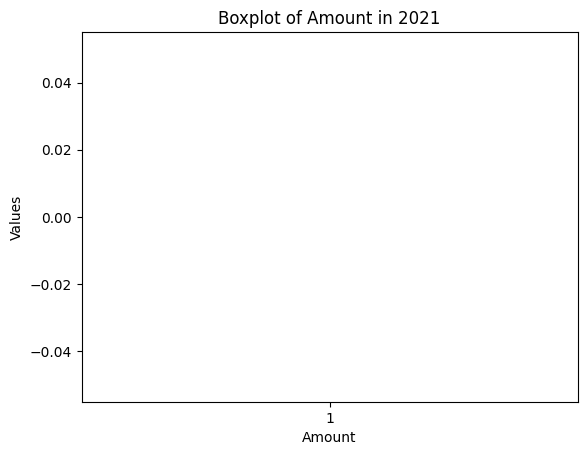

In [31]:

# Create the boxplot
plt.boxplot(data2021['Amount'])

# Add a title and labels to the plot
plt.title("Boxplot of Amount in 2021")
plt.xlabel("Amount")
plt.ylabel("Values")

# Display the plot
plt.show()


In [33]:
#replace the Amount column with the median
data2021['Amount'].fillna(data2021['Amount'].median(),inplace=True)

In [34]:
#checked for duplicates
data2021.duplicated().sum()

19

In [35]:
#Drop the duplicates found
data2021.drop_duplicates(inplace=True)

In [36]:
#Replace stage with the mode
data2021['Stage'].fillna(data2021['Stage'].mode()[0], inplace=True)



In [37]:
#fill the empty founders column with Unknown
default_Founders = 'Unknown'
data2021['Founders'] = data2021['Founders'].fillna(default_Founders)

In [38]:
#fill the empty founders column with Unknown
default_investor = 'Unknown'
data2021['Investor'] = data2021['Investor'].fillna(default_investor)

In [40]:
# assign the value '2021' in the 'Funded_year column'
data2021 = data2021.assign(Funded_year=2021,inplace=False)


In [41]:
#display the first few rows of the DataFrame to quickly inspect the data and get an overview of its structure
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funded_year,inplace
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021,False
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,Seed,2021,False
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021,False
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021,False
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021,False


# 2020 Dataset

In [42]:
#find null values
null_values2020=data2020.isna().sum()
null_values2020

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [43]:
#change the datatype of founded to datetime
data2020['Founded'] = pd.to_datetime(data2020['Founded'], format='%Y').dt.year


In [44]:
#display the first few rows of the DataFrame to quickly inspect the data and get an overview of its structure
data2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [45]:
#count the occurrences of each unique value in the 'Stage' column
data2020['Stage'].value_counts

<bound method IndexOpsMixin.value_counts of 0             None
1         Pre-seed
2         Pre-seed
3             None
4             None
           ...    
1050          None
1051    Seed Round
1052          None
1053      Series C
1054      Series A
Name: Stage, Length: 1055, dtype: object>

In [46]:
#fill the Amount column with the median
data2020['Amount'].fillna(data2020['Amount'].median(),inplace=True)

In [47]:
#fill the founded column with the mean
data2020['Founded'].fillna(data2020['Founded'].mean(),inplace=True)

In [48]:
#fill the sector with the mode
data2020['Sector'].fillna(data2020['Sector'].mode()[0], inplace=True)



In [49]:
#Drop empty column
data2020.drop('column10', axis=1, inplace=True)

In [50]:
#Replace the missing values
data2020['Stage'].fillna(data2020['Stage'].mode()[0], inplace=True)

In [51]:
#Replace unknown to empty investor column
default_investor = 'Unknown'
data2020['Investor'] = data2020['Investor'].fillna(default_investor)

In [52]:
#Replace unknown to empty found column
default_Founders = 'Unknown'
data2020['Founders'] = data2020['Founders'].fillna(default_Founders)

In [53]:
#Replace null Headquarters with india
default_HeadQuarter = 'India'
data2020['HeadQuarter'] = data2020['HeadQuarter'].fillna(default_HeadQuarter)

In [54]:
#checked for duplicates
data2020.duplicated().sum()

3

In [55]:
#Drop the duplicates found
data2020.drop_duplicates(inplace=True)

# 2019 Dataset

In [56]:
#check the size and dimensions of the DataFrame
data2019.shape

(89, 9)

In [57]:
#check the first 5 rows
data2019.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [58]:
#check for missing values
data2019.isna().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [59]:
#display a concise summary including the data types of each column, the number of non-null values, and memory usage.
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [60]:
#convert the 'Founded' column to datetime format
data2019['Founded'] = pd.to_datetime(data2019['Founded'], format='%Y').dt.year


In [61]:
#replace missing values in the 'Founded' column with the mode
data2019['Founded'].fillna(data2019['Founded'].mode(),inplace=True)

In [62]:
#replace missing values in the 'stage' column with the mode
data2019['Stage'].fillna(data2019['Stage'].mode().iloc[0], inplace=True)

In [63]:
#fill missing values in the 'Headquarter' column with 'India'
default_HeadQuarter = 'India'
data2019['HeadQuarter'] = data2019['HeadQuarter'].fillna(default_HeadQuarter)

In [64]:
# select first 89 rows
data2019.iloc[:89]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,2015.0,India,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",Series A
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",Series A
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013.0,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",Series A
86,GoMechanic,2016.0,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015.0,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",Series A


In [65]:
#get row null values in the 'Sector' column
data2019.loc[data2019['Sector'].isnull()]

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
41,VMate,NaN,India,NaN,A short video platform,NaN,Alibaba,"$100,000,000",Series A
49,Awign Enterprises,2016.0,Bangalore,NaN,It supplies workforce to the economy,"Annanya Sarthak, Gurpreet Singh, Praveen Sah","Work10M, Michael and Susan Dell Foundation, Ea...","$4,000,000",Series A
52,TapChief,2016.0,Bangalore,NaN,It connects individuals in need of advice in a...,"Shashank Murali, Binay Krishna, Arjun Krishna",Blume Ventures.,"$1,500,000",Pre series A
56,KredX,NaN,Bangalore,NaN,Invoice discounting platform,Manish Kumar,Tiger Global Management,"$26,000,000",Series B
57,m.Paani,NaN,Mumbai,NaN,It digitizes and organises local retailers,Akanksha Hazari,"AC Ventures, Henkel","$5,500,000",Series A


In [66]:
#update specific values in the 'Sector' column of the DataFrame data2019, 
#it also fills any remaining missing (NaN) values in the 'Sector' column with the value 'Unknown'
data2019.loc[41, 'Sector'] = 'Media & Entertainment market'
data2019.loc[49, 'Sector'] = 'HR Tech'
data2019.loc[52, 'Sector'] = 'Ed Tech'
data2019.loc[56, 'Sector'] = 'FinTech'
data2019.loc[57, 'Sector'] = 'Ecommerce'
data2019['Sector'].fillna('Unknown', inplace=True)

In [67]:
#fill null values witjh 'unknown' in the 'Founders' column
default_Founders = 'unknown'
data2019['Founders'] = data2019['Founders'].fillna(default_Founders)

In [68]:

#remove any ', $' sign from the 'Amount' colunm
#convert the cleaned 'amount' colunm to numeric
data2019['Amount($)'] = data2019['Amount($)'].str.replace(r'[$,]', '', regex=True)
data2019['Amount($)'] = pd.to_numeric(data2019['Amount($)'], errors='coerce').astype(float)


In [69]:
#displays a concise summary of the DataFrame, including the data types of each column, the number of non-null values, and memory usage.
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        61 non-null     float64
 2   HeadQuarter    89 non-null     object 
 3   Sector         89 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       89 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      77 non-null     float64
 8   Stage          89 non-null     object 
dtypes: float64(2), object(7)
memory usage: 6.4+ KB


# 2018 Datasets

In [70]:
#show dimensions of the DataFrame

data2018.shape

(526, 6)

In [71]:
#inspect the first 5 rows
data2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [72]:
#check to see if there are any null values
data2018.isna().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [113]:
#replace the '₹,' in the 'Amount' column with blank space
#convert the 'Amount' column to numeric 
data2018['Amount'] = data2018['Amount'].astype(str).str.replace(r'[₹,]', '', regex=True)
data2018['Amount'] = pd.to_numeric(data2018['Amount'], errors='coerce').astype(float)


In [110]:
#fill null values with median in the 'Amount' column
data2018['Amount'].fillna(data2018['Amount'].median(), inplace=True)

In [111]:
#displays a concise summary of the DataFrame, including the data types of each column, the number of non-null values, and memory usage.

data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  526 non-null    object 
 1   Sector         526 non-null    object 
 2   Stage          526 non-null    object 
 3   Amount         526 non-null    float64
 4   HeadQuarter    526 non-null    object 
 5   What_it_does   526 non-null    object 
 6   Funded_year    526 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 28.9+ KB


# Data Analysis

In [76]:
#convert data into CSV
data2021.to_csv('data2021.csv')

In [77]:
#convert data into CSV
data2020.to_csv('data2020.csv')

In [78]:
#inspect the first 5 rows of the dataframe
data2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funded_year,inplace
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021,False
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,Seed,2021,False
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021,False
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021,False
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021,False


In [79]:
#add a new column named 'Funded_year' in the 2020 dataset
year = 2020
data2020['Funded_year'] = year

In [80]:
#add a new column named 'Funded_year' in the 2019 dataset

year = 2019
data2019['Funded_year'] = year

In [81]:
#add a new column named 'Funded_year' in the 2018 dataset

year = 2018
data2018['Funded_year'] = year

In [82]:
#inspect rows in the 2018 dataset
data2018

,Company Name,Industry,Round/Series,Amount,Location,About Company,Funded_year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,40000000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,65000000.0,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000.0,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,8000000.0,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000.0,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,"Tourism, Travel",Series A,8000000.0,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500.0,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,35000000.0,"Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018


In [83]:
#rename columns in the 2018 dataset
data2018.rename(columns={'Company Name': 'Company_Brand','Industry': 'Sector','Round/Series': 'Stage','Location': 'HeadQuarter','About Company': 'What_it_does'}, inplace=True)

In [84]:
#inspect the 2020 dataframe
data2020

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funded_year
0,Aqgromalin,2019.00000,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,Series A,2020
1,Krayonnz,2019.00000,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.00000,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,3000000.0,Pre-seed,2020
3,NCOME,2020.00000,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,Series A,2020
4,Gramophone,2016.00000,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,Series A,2020
...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,2015.36342,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000.0,Series A,2020
1051,EpiFi,2015.36342,India,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000.0,Seed Round,2020
1052,Purplle,2012.00000,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000.0,Series A,2020
1053,Shuttl,2015.00000,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000.0,Series C,2020


In [85]:
#rename columns in the 2019 dataset
data2019.rename(columns={'Company/Brand': 'Company_Brand','Amount($)': 'Amount','What it does':'What_it_does'}, inplace=True)

In [86]:
#inspect the 2021 dataset
data2021

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funded_year,inplace
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021,False
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,Seed,2021,False
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021,False
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021,False
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021,False
...,...,...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019.0,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,3000000.0,Pre-series A,2021,False
1205,Vahdam,2015.0,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,20000000.0,Series D,2021,False
1206,Leap Finance,2019.0,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,55000000.0,Series C,2021,False
1207,CollegeDekho,2015.0,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",26000000.0,Series B,2021,False


In [87]:
#drop the column named 'inplace' in the 2021 dataset
data2021.drop('inplace', axis=1, inplace=True)


In [88]:
#merge the 2021,2020,2019 and 2018 dataset
merged_df = pd.concat([data2021, data2020,data2019,data2018], ignore_index=True)

In [89]:
#inspect the merged dataset
merged_df

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funded_year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,Seed,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed,2021
...,...,...,...,...,...,...,...,...,...,...
2852,Udaan,NaN,"Bangalore, Karnataka, India","B2B, Business Development, Internet, Marketplace","Udaan is a B2B trade platform, designed specif...",NaN,NaN,225000000.0,Series C,2018
2853,Happyeasygo Group,NaN,"Haryana, Haryana, India","Tourism, Travel",HappyEasyGo is an online travel domain.,NaN,NaN,8000000.0,Series A,2018
2854,Mombay,NaN,"Mumbai, Maharashtra, India","Food and Beverage, Food Delivery, Internet",Mombay is a unique opportunity for housewives ...,NaN,NaN,7500.0,Seed,2018
2855,Droni Tech,NaN,"Mumbai, Maharashtra, India",Information Technology,Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,35000000.0,Seed,2018


In [90]:

#check for null values
merged_df.isna().sum()

Company_Brand      0
Founded          554
HeadQuarter        1
Sector             0
What_it_does       0
Founders         526
Investor         526
Amount            12
Stage              0
Funded_year        0
dtype: int64

In [91]:
#inspect the first 100 rows in thw 'Headquarter' column
merged_df['HeadQuarter'].head(100)

0          Bangalore
1             Mumbai
2             Mumbai
3             Mumbai
4           Gurugram
           ...      
95         Bangalore
96            Mumbai
97         New Delhi
98    Computer Games
99            Mumbai
Name: HeadQuarter, Length: 100, dtype: object

In [92]:
#fill null values in the 'Amount' column with the median
merged_df['Amount'].fillna(data2018['Amount'].median(), inplace=True)

In [93]:
#fill null values  in the 'Founders' column with 'Unknown'
default_Founders = 'Unknown'
merged_df['Founders'] = merged_df['Founders'].fillna(default_Founders)

In [94]:
#fill null values  in the 'Investor' column with 'Unknown'

default_Founders = 'Unknown'
merged_df['Investor'] = merged_df['Investor'].fillna(default_Founders)

In [95]:
#fill null values  in the 'Founded' column with mean


merged_df['Founded'].fillna(merged_df['Founded'].mean(), inplace=True)

In [96]:
#fill null values  in the 'Headquarter' column with 'India'

default_Founders = 'India'
merged_df['HeadQuarter'] = merged_df['HeadQuarter'].fillna(default_Founders)

# DataAnalysis

H0:All companies get funding equally

H1:Tech company get more funding than other companies

H0:Sum of total funding was equal every year

H1:Sum of total funding increased yearly

H0:all cities received equal funding

H1:Big cities received a higher funding compared to subsequent cities

H0:Founders didn't in two or more fintech

H1:Founders weren't restricted on the number of company

H0:most funded companies were founded after 2014

H1:some companies were founded before 2014

Text(0.5, 1.0, 'Top 5 Funded Companies')

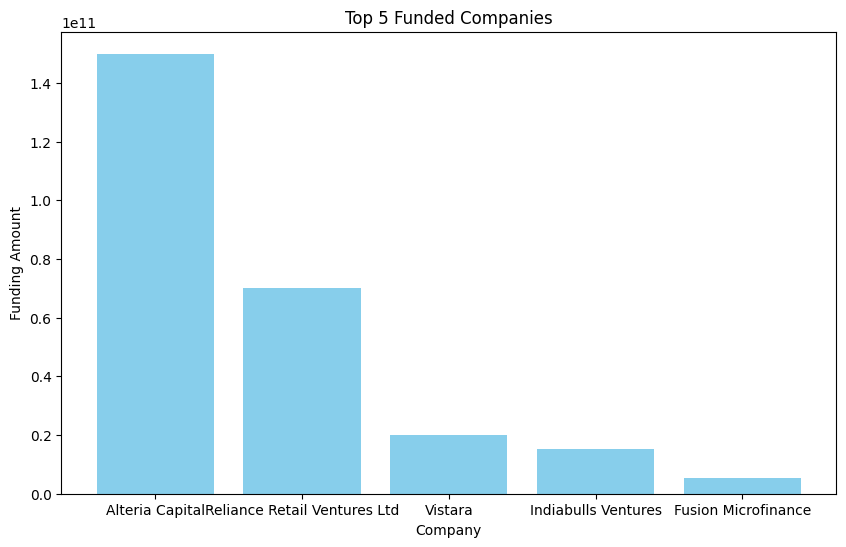

In [97]:
#H0:All companies get funding equally
#H1:Tech company get more fnding than other companies

import pandas as pd
import matplotlib.pyplot as plt
# Sort the DataFrame by 'Amount' in descending order
df_sorted = merged_df.sort_values(by='Amount', ascending=False)

# Get the top five companies and their corresponding funding amounts
top_five_companies = df_sorted.head(5)

# Create a bar graph
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(top_five_companies['Company_Brand'], top_five_companies['Amount'], color='skyblue')

# Optional: Add labels and title
plt.xlabel('Company')
plt.ylabel('Funding Amount')
plt.title('Top 5 Funded Companies')

# Optional: Rot

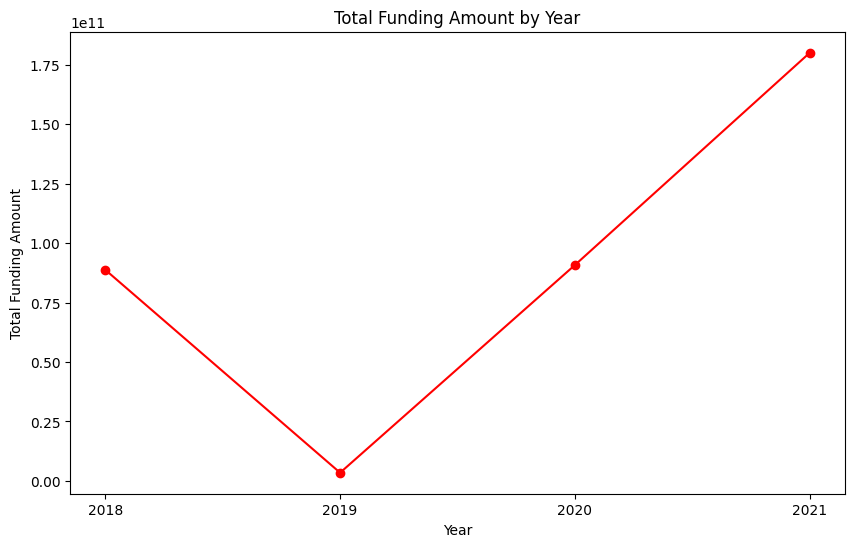

In [98]:
#H0:Sum of total funding was equal every year
#H1:Sum of total funding increased yearly
grouped_df = merged_df.groupby('Funded_year')['Amount'].sum().reset_index()

# Create a line chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(grouped_df['Funded_year'], grouped_df['Amount'], marker='o', linestyle='-', color='Red')

# Optional: Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Funding Amount')
plt.title('Total Funding Amount by Year')

# Optional: Customize the x-axis tick labels
plt.xticks(grouped_df['Funded_year'])

# Display the line chart
plt.show()


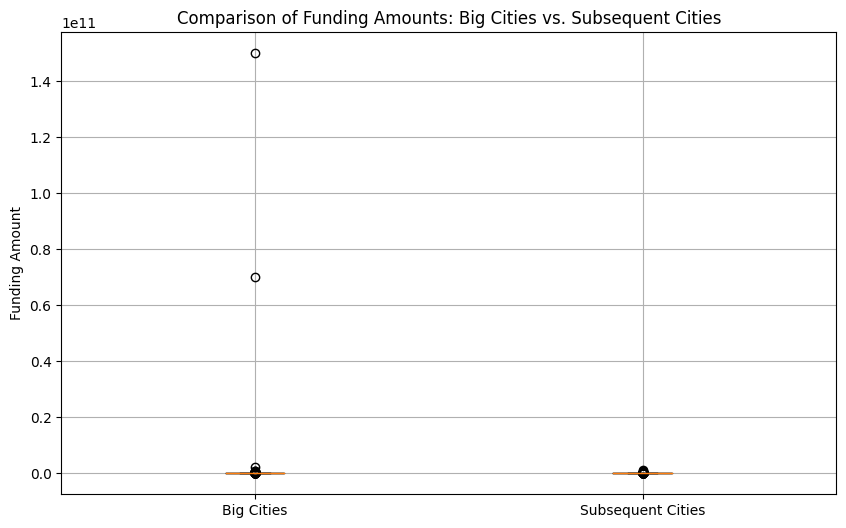

In [99]:
#H0:all cities received equal funding
#H1:Big cities received a higher funding compared to subsequent cities
# Assuming you have already separated 'big cities' and 'subsequent cities'
big_cities = ['Mumbai', 'New Delhi','Hyderabad']  # Modify this list based on your definition of big cities
subsequent_cities = ['Jaipur','Bangalore','Ahmadabad']     # Modify this list based on your definition of subsequent cities

# Create separate DataFrames for big cities and subsequent cities
big_cities_df =merged_df[merged_df['HeadQuarter'].isin(big_cities)]
subsequent_cities_df = merged_df[merged_df['HeadQuarter'].isin(subsequent_cities)]

# Create a box plot to compare the distribution of funding amounts for big cities and subsequent cities
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.boxplot([big_cities_df['Amount'], subsequent_cities_df['Amount']], labels=['Big Cities', 'Subsequent Cities'])
plt.ylabel('Funding Amount')
plt.title('Comparison of Funding Amounts: Big Cities vs. Subsequent Cities')
plt.grid(True)  # Optional: Add grid lines for better visualization


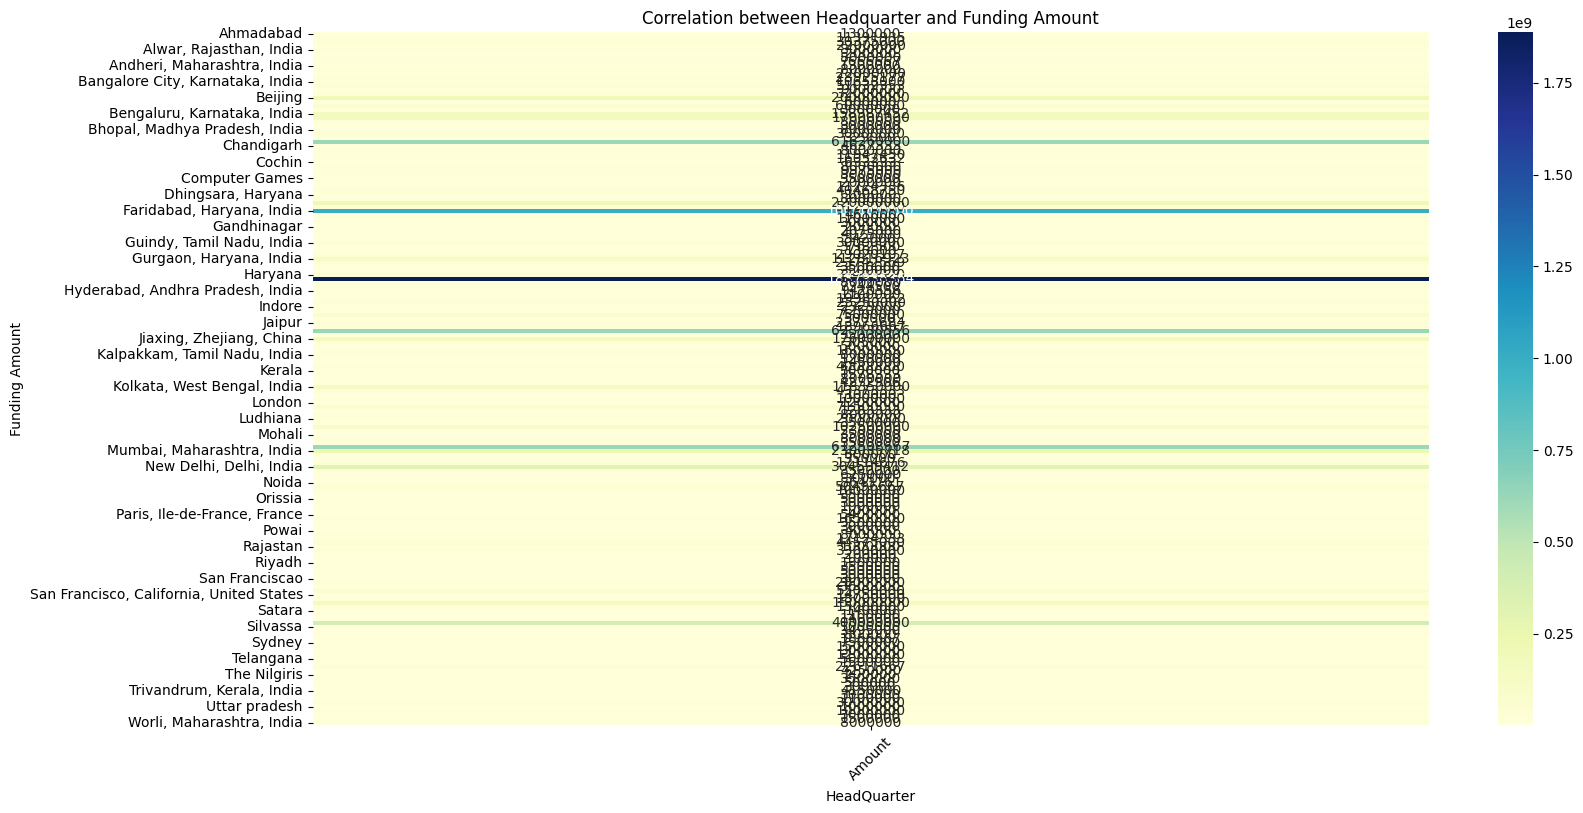

In [100]:
import seaborn as sns
pivot_table = merged_df.pivot_table(index='HeadQuarter', values='Amount', aggfunc='mean')

# Create a heatmap to visualize the correlation
plt.figure(figsize=(18, 9))  # Optional: Set the figure size
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".0f")
plt.xlabel('HeadQuarter')
plt.ylabel('Funding Amount')
plt.title('Correlation between Headquarter and Funding Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility (optional)

# Display the heatmap
plt.show()

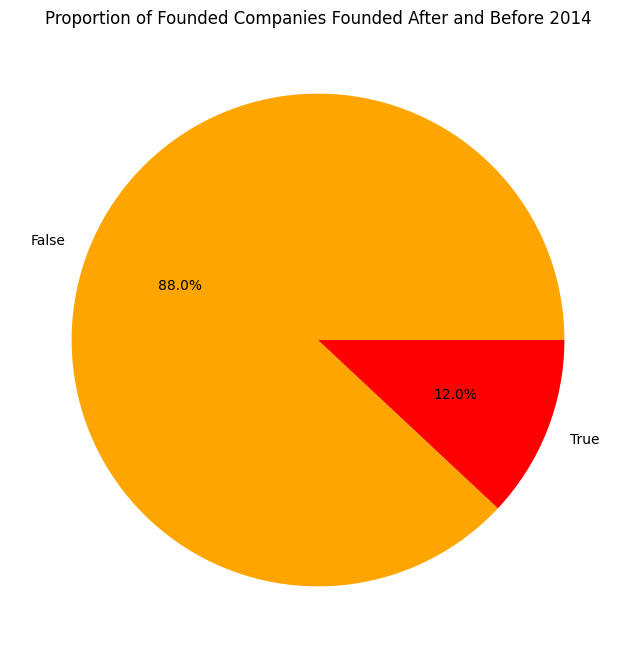

In [101]:

# Define the cutoff year for the hypothesis
cutoff_year = 2014

# Create a new column 'Founded_before_2014' to indicate if a company was founded before 2014
merged_df['Founded_before_2014'] = merged_df['Founded'] < cutoff_year

# Count the number of companies founded after and before 2014
counts = merged_df['Founded_before_2014'].value_counts()

# Create a pie chart to visualize the proportion of funded companies founded after and before 2014
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['orange', 'Red'])
plt.title('Proportion of Founded Companies Founded After and Before 2014')

# Display the pie chart
plt.show()


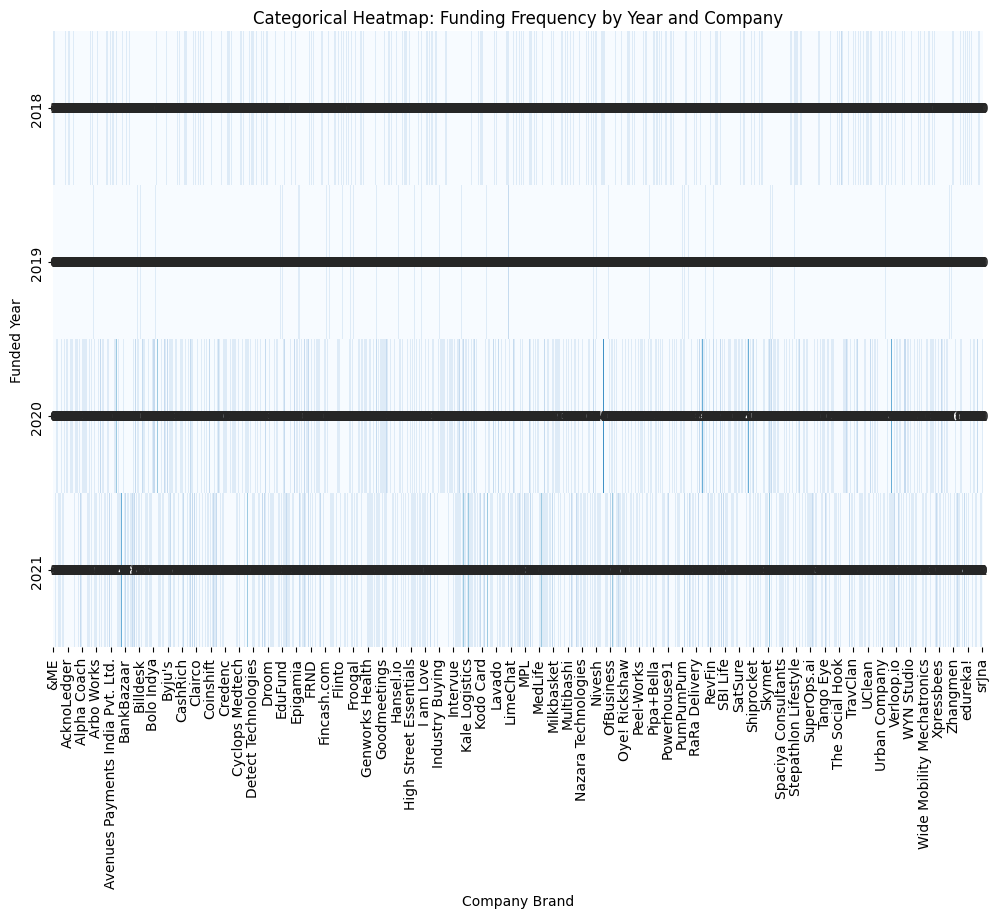

In [102]:
# Create a cross-tabulation to get frequency counts of Company_brand for each Funded_year
cross_tab = pd.crosstab(merged_df['Funded_year'], merged_df['Company_Brand'])

# Create a heatmap to visualize the cross-tabulation
plt.figure(figsize=(12, 8))  # Optional: Set the figure size
sns.heatmap(cross_tab, cmap='Blues', annot=True, fmt='d', cbar=False)
plt.title('Categorical Heatmap: Funding Frequency by Year and Company')
plt.xlabel('Company Brand')
plt.ylabel('Funded Year')
plt.show()

In [103]:
merged_df.to_csv('merged_df.csv')